# Plotting the Energy Deposited in the Detector

The detector is an 8x8 grid of channels with channel 1 in the top left corner and channel 8 in the top right corner

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import Normalize


import numpy as np, os, pandas as pd
from my_classes import *
%matplotlib widget

In [18]:
extracted_dir = 'ohio_data/extracted_data/'
files = [os.path.join(extracted_dir, file) for file in os.listdir(extracted_dir) if file.endswith('txt') and '22' not in file]

energy_dict = {}
for file in files:
    df = pd.read_csv(file, delim_whitespace=True)
    file_name = os.path.basename(file)
    data_array = np.array(df['edep'])
    energy_dict[file_name] = data_array

## Note

- It should be noted the data from rotated files Eg *_r.txt, after the data is extended into 3 dimensions the 'cube' of numbers have to be rotated 90 degrees. This is because normally the detector is represented by the xy plane with the bars extending up into the z-axis, when it is rotated, the detector is on the yz plane with bars extending in the y direction

- The rotation is with rotdim( axis=(0, 2))
    - 0 is y-axis on the graph
    - 2 is the z-axis

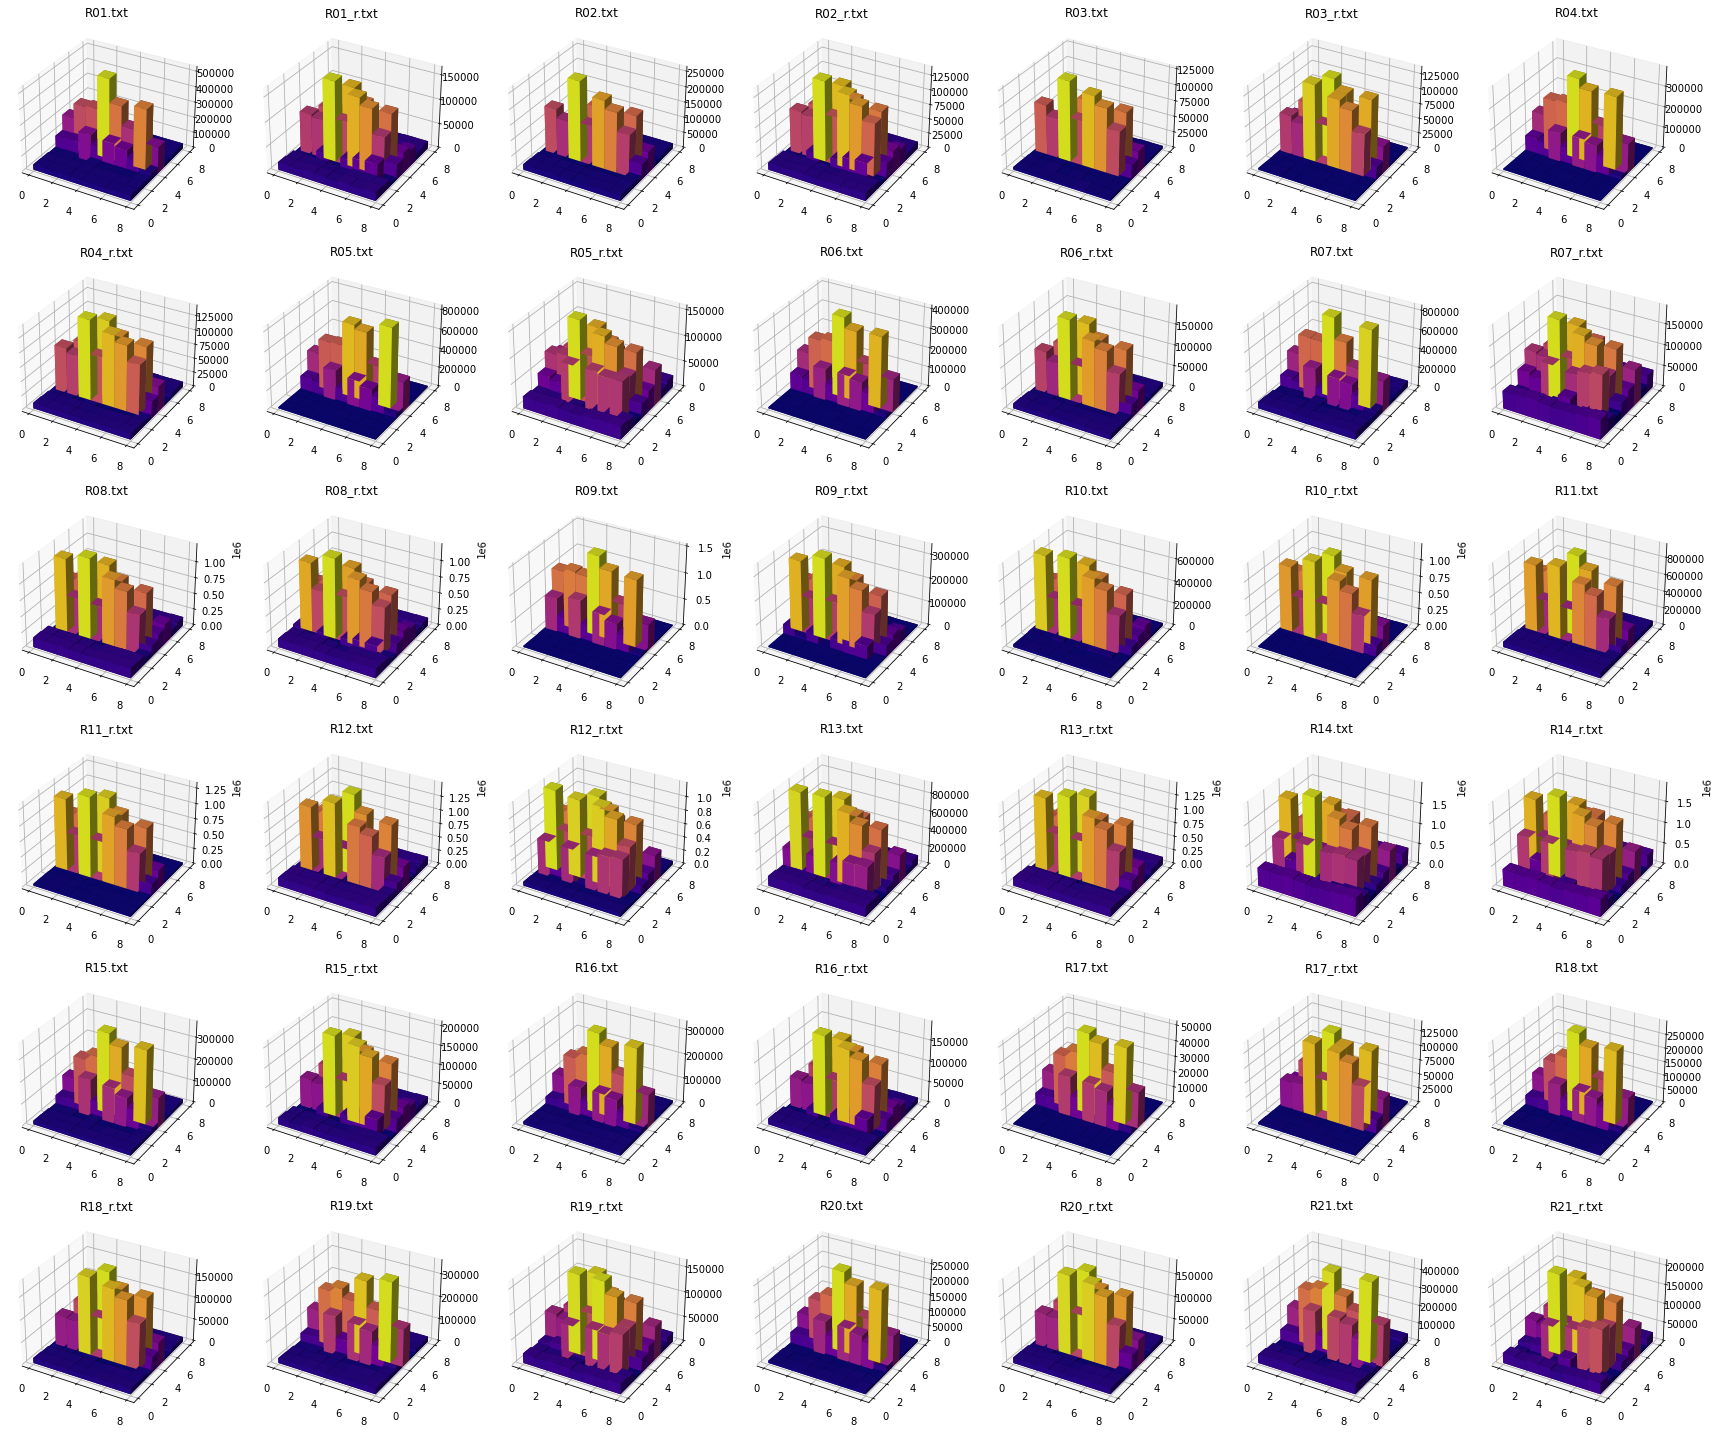

In [19]:
# Gets the colormap plasma and creates a normalization function to scale the colors to the min and max of the data
cmap = cm.get_cmap('plasma')

%matplotlib inline
fig = plt.figure(figsize=(30, 30))
for key, index in zip(sorted(energy_dict), range(len(energy_dict))):
    data = energy_dict[key]
    norm = Normalize(vmin=min(data), vmax=max(data)) # Defines the color map for the specific bar chart
    ax = fig.add_subplot(7, 7, 1 + index, projection='3d')
    
    ax.bar3d(*bar_chart_helper(data), color=cmap(norm(data)))
    ax.set_title(key)
    


Text(0.5, 0.92, 'R03.txt')

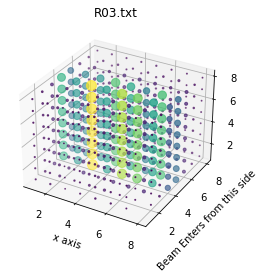

In [5]:
x, y, z = create_3d_cords()

fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, c=reshape_extend(energy_dict['R03.txt']), s=calculate_sizes(reshape_extend(energy_dict['R03.txt'])))
ax.set_xlabel('x axis')
ax.set_ylabel('Beam Enters from this side')
ax.set_title('R03.txt')
#plt.close(fig)

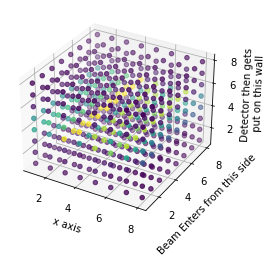

In [6]:
x, y, z = create_3d_cords()
data = np.rot90(reshape_extend(energy_dict['R03_r.txt']), axes=(0, 2))

fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, c=data)#, s=calculate_sizes(data))
ax.set_xlabel('x axis')
ax.set_ylabel('Beam Enters from this side')
ax.set_zlabel('Detector then gets\n put on this wall')
plt.show()

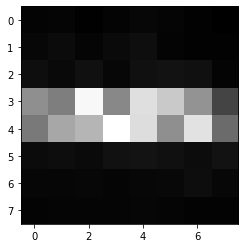

In [7]:
plt.figure()
plt.imshow(energy_dict['R03_r.txt'].reshape((8,8)), cmap='gray')
plt.show()

%matplotlib inline
fig = plt.figure(figsize=(30, 30))
x, y, z = create_3d_cords()

for run, energy_matrix, axis, index in zip(energy_dict.keys(), energy_dict.values(), axes.flatten(), range(len(energy_dict))):
    ax = plt.subplot(7, 7, 1+index, projection='3d')
    
    plotting_data = reshape_extend(energy_matrix)
    ax.scatter(x, y, z, c=plotting_data, s=calculate_sizes(plotting_data))

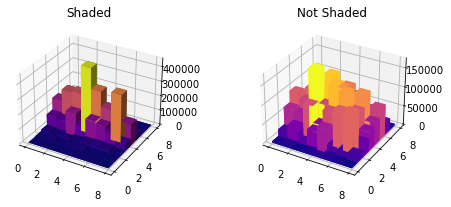

In [8]:
from matplotlib import cm
from matplotlib.colors import Normalize
dz = energy_dict['R01.txt']
cmap = cm.get_cmap('plasma')
norm = Normalize(vmin=min(dz), vmax=max(dz))
colors = cmap(norm(dz))
#colors = Normalize(dz.max(), dz.max())

# setup the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')


ax1.bar3d(*bar_chart_helper(energy_dict['R01.txt']), shade=True, color=colors)
ax1.set_title('Shaded')

dz = energy_dict['R07_r.txt']
cmap = cm.get_cmap('plasma')
norm = Normalize(vmin=min(dz), vmax=max(dz))
colors = cmap(norm(dz))

ax2.bar3d(*bar_chart_helper(energy_dict['R07_r.txt']), shade=False, color=colors)
ax2.set_title('Not Shaded')

plt.show()